# Kesimpulan

1. 1 Point Kenaikan dalam **Average Session Length** 
> User akan menggunakan uangnya sebesar **25.88 Dollar**
2. 1 Point Kenaikan dalam **Time on App** 
> User akan menggunakan uangnya sebesar **38.51 Dollar**
3. 1 Point Kenaikan dalam **Time on Website** 
> User akan menggunakan uangnya sebesar **0.57 Dollar**
4. 1 Point Kenaikan dalam **Length of Membership** 
> User akan menggunakan uangnya sebesar **61.49 Dollar**

**Suggestion**

> Memfokuskan pengembangan **Aplikasi Mobile** dengan tujuan untuk Memperbesar Rasio **Membership** dan Menaikkan **Total Spent dari User**.

*Researched by : Rahmatuel Samuel*

## Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Ecommerce_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            500 non-null    int64  
 1   Email                 500 non-null    object 
 2   Address               500 non-null    object 
 3   Avatar                500 non-null    object 
 4   Avg. Session Length   500 non-null    float64
 5   Time on App           500 non-null    float64
 6   Time on Website       500 non-null    float64
 7   Length of Membership  500 non-null    float64
 8   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [3]:
df.isnull().sum()

Unnamed: 0              0
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Menghilangkan Email, Address dan Avatar

In [4]:
df = df.drop(['Email','Avatar','Address','Unnamed: 0'], axis =1)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Visualization with Pair Plot
### Kesimpulan

1. Length of Membership memiliki korelasi terkuat dengan Yearly Amount Spent

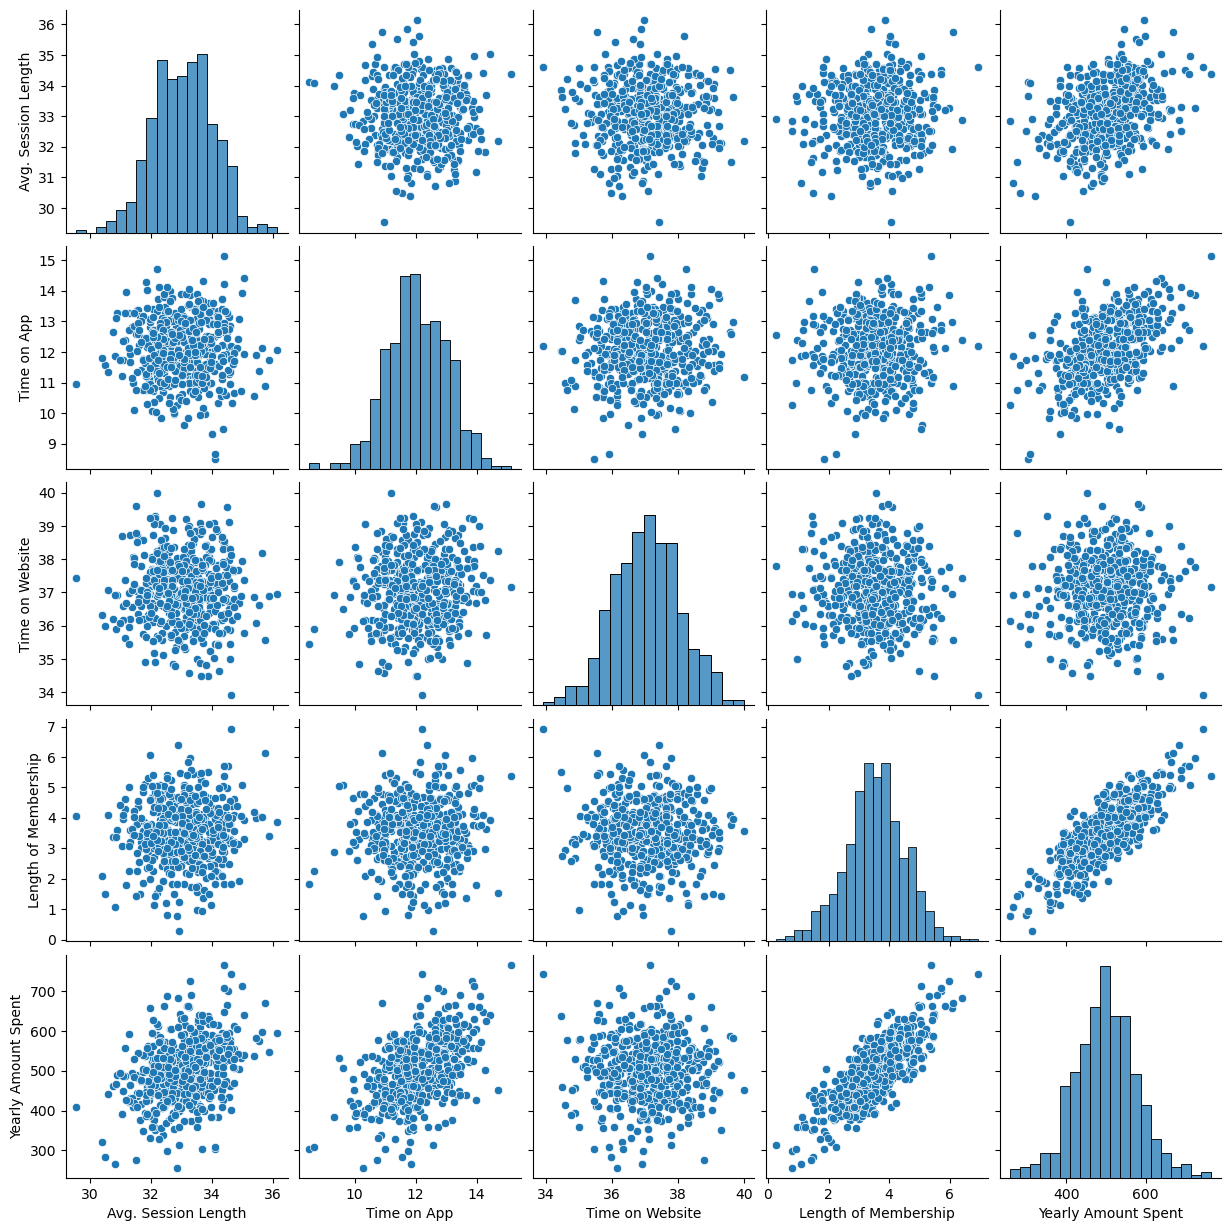

In [17]:
sns.pairplot(df)

## Penentuan Variabel
> Dependen
1. Yearly Amount Spent

> Independen
1. Average Session Length
2. Time on App
3. Time on Website
4. Length of Membership

## Visualization with Pair Plot

<AxesSubplot:>

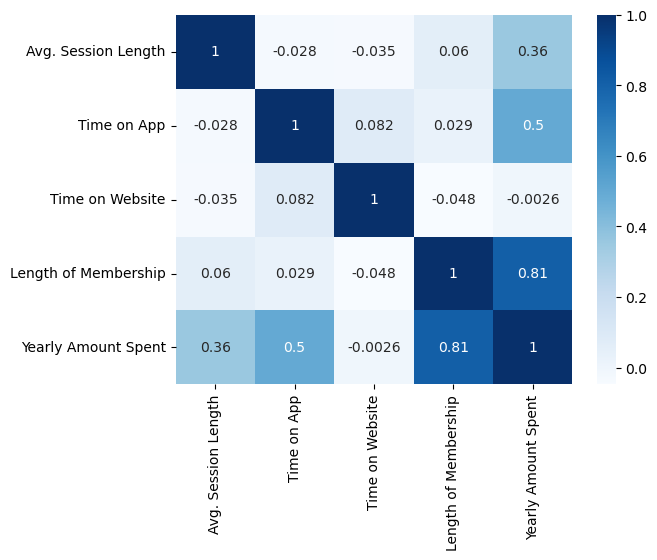

In [84]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

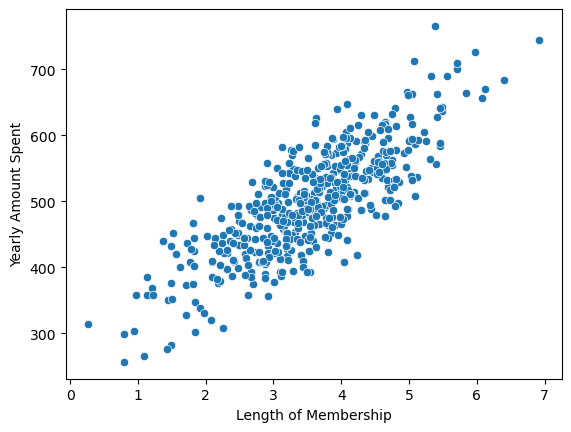

In [24]:
# scatterplot
sns.scatterplot(
    data = df,
    x='Length of Membership',
    y='Yearly Amount Spent'
)

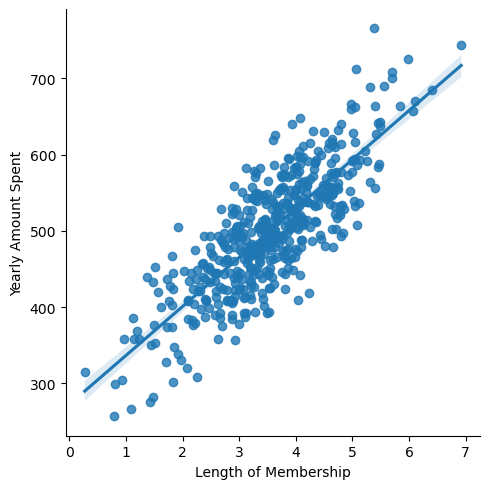

In [87]:
# linear model plot
sns.lmplot(
    data = df,
    x='Length of Membership',
    y='Yearly Amount Spent'
)

## Plotting Distribusi tiap Variabel

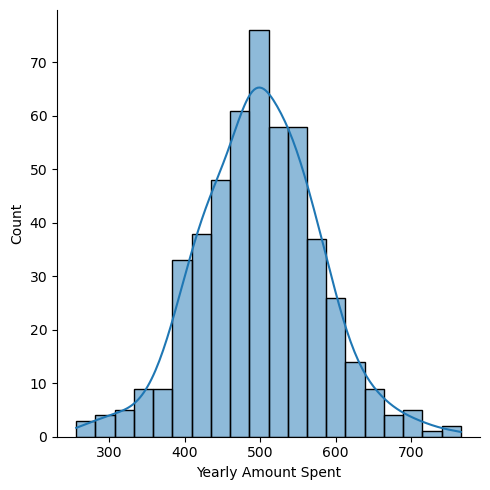

In [30]:
# distribusi Yearly Amount Spent
sns.displot(df['Yearly Amount Spent'],kde=True)

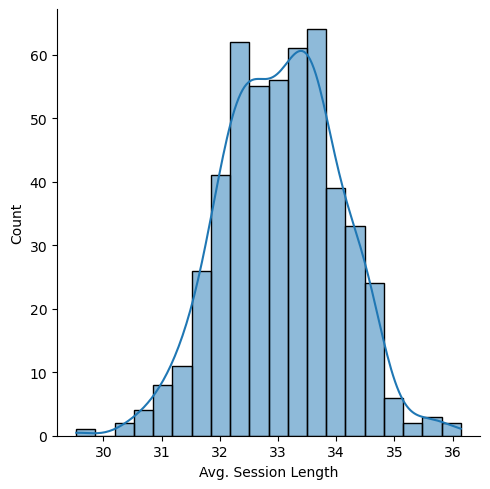

In [33]:
# distribusi Average Session Length
sns.displot(df['Avg. Session Length'],kde=True)

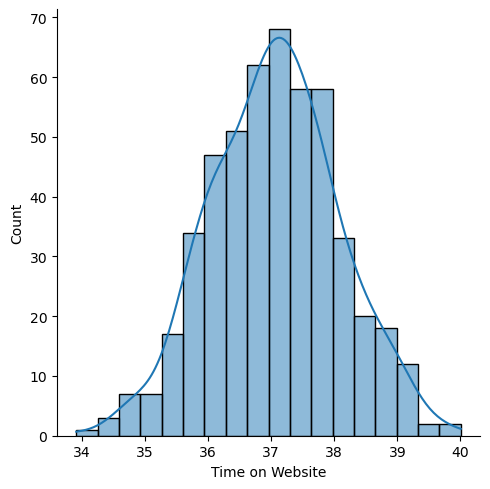

In [36]:
# distribusi Time on Website
sns.displot(df['Time on Website'],kde=True)

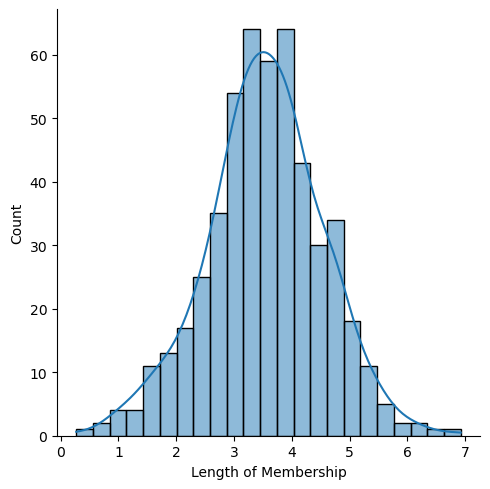

In [35]:
# distribusi Length of Membership
sns.displot(df['Length of Membership'],kde=True)

## Train Test

In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
y = df['Yearly Amount Spent']
x = df.drop(['Yearly Amount Spent'], axis =1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
print("                         x_train Result")
print("================================================================")
display(x_train)
print("                          x_test Result")
print("================================================================")
display(x_test)
print("                         y_train Result")
print("================================================================")
display(y_train)
print("                          y_test Result")
print("================================================================")
display(y_test)

                         x_train Result


,Avg. Session Length,Time on App,Time on Website,Length of Membership
467,33.459619,12.664391,36.366843,1.726962
83,32.402371,10.875560,37.781143,1.914090
245,32.980029,11.201160,37.689337,2.412831
165,32.047801,12.718039,37.661107,3.675849
163,30.879484,13.280432,36.936159,3.585161
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


                          x_test Result


,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
248,32.959764,11.546276,36.947954,3.275071
145,33.477190,12.488067,36.518384,3.345571
92,33.471601,11.662263,36.050241,3.997255
152,32.510218,10.984836,37.396497,5.391275


                         y_train Result


467    436.580740
83     338.319863
245    409.070472
165    513.450571
163    490.206600
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 300, dtype: float64

                          y_test Result


361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
248    448.340425
145    505.771140
92     515.828815
152    555.892595
367    407.657179
Name: Yearly Amount Spent, Length: 200, dtype: float64

## $R^2$, MAE, MAPE, RMSE, MSE dan Interpretasi

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [69]:
print('R2 Values   :', round(r2_score(y_test, y_predict), 3))
print('MAE Values  :', round(mae(y_test, y_predict), 3))
print('MAPE Values :', round(mape(y_test, y_predict)*100, 3))
print('RMSE Values :', round(mse(y_test, y_predict, squared = False), 3))
print('MSE Values  :', round(mse(y_test, y_predict), 3))

R2 Values   : 0.983
MAE Values  : 8.248
MAPE Values : 1.709
RMSE Values : 9.987
MSE Values  : 99.741


## OLS Train

In [70]:
x_train = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     4878.
Date:                 Mon, 20 Feb 2023   Prob (F-statistic):          4.79e-268
Time:                         10:59:37   Log-Likelihood:                -1114.1
No. Observations:                  300   AIC:                             2238.
Df Residuals:                      295   BIC:                             2257.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1058.4004     28.710    -36.865      0.000   -1114.902   -1001.898
Avg. Session Length     25.8840      0.580     44.658      0.000      24.743      27.025
Time on App             38.5152      0.566     68.004      0.000      37.401      39.630
Time on Website          0.5751      0.572      1.006      0.315      -0.550       1.700
Length of Membership    61.4902      0.565    108.902      0.000      60.379      62.601
==============================================================================
Omnibus:                        2.117   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.839
Skew:                          -0.131   Prob(JB):                        0.399
Kurtosis:                       3.281   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## LR Training

In [63]:
r = LinearRegression()
r = r.fit(x_train, y_train)
r

LinearRegression()

In [66]:
y_predict = r.predict(x_test)

## y_Test vs Predict Scatter Plot
### Kesimpulan
1. Korelasi Kuat terlihat pada model, yang berarti model bagus dan dapat digunakan untuk future research karena bisa dilihat pada Plot Y Test dengan Predict satu garis linier.

Text(0.5, 1.0, 'Test Y VS Predict Y')

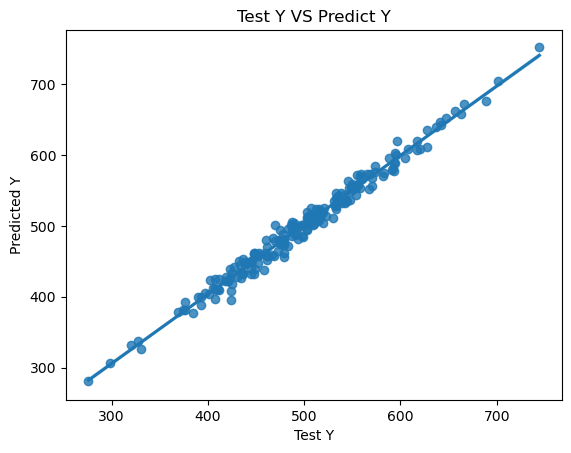

In [71]:
sns.regplot(x = y_test, y = y_predict)
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.title('Test Y VS Predict Y')

### Akurasi Model
Setelah di cek akurasi model sebesar 98% atau NILAI $R2$ = 0.983, yang artinya bagus untuk digunakan lagi.

In [74]:
from sklearn import metrics

In [76]:
metrics.explained_variance_score(y_test, y_predict)

0.9831720925900429

### Koefisien Variabel Independent

In [85]:
coeff_df = pd.DataFrame(r.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.883956
Time on App,38.515206
Time on Website,0.575107
Length of Membership,61.490172
